In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection, PolyCollection
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from six.moves import xrange, zip
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)


In [19]:
df =pd.read_csv('C:/Users/91766/Desktop/learn/nsedata/RELIANCE.csv')
df=df[['Date', 'Symbol','Open Price', 'High Price',
       'Low Price','Close Price','Total Traded Quantity']]
df=df.head(60)
df=df.loc[::-1]
df=df.iloc[0:60,0:7]
df['ha-open'] = 0
df['ha-high'] = 0
df['ha-low'] = 0
df['ha-close'] = 0
df.reset_index(inplace=True)
df['ha-open'] = df['ha-open'].astype(float)
df['ha-high'] = df['ha-high'].astype(float)
df['ha-low'] = df['ha-low'].astype(float)
df['ha-close'] = df['ha-close'].astype(float)

In [20]:
for i in range(0,60):
    if(i==0):
        df['ha-open'][i] = df['Open Price'][i]
        df['ha-close'][i] = df['Close Price'][i]
        df['ha-low'][i]  = df['Low Price'][i]
        df['ha-high'][i] = df['High Price'][i]
    else:
        df['ha-open'][i] = round((df['ha-open'][i-1] + df['ha-close'][i-1])/2,2)
        df['ha-close'][i] = round((df['Close Price'][i] + df['Open Price'][i] + df['High Price'][i] + df['Low Price'][i])/4,2)
        df['ha-high'][i]  = round(max(df['Close Price'][i] , df['Open Price'][i] , df['High Price'][i]),2)
        df['ha-low'][i] = round(min(df['Close Price'][i] , df['Open Price'][i] , df['Low Price'][i]),2)

<ipython-input-20-3940411adcbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ha-open'][i] = df['Open Price'][i]
<ipython-input-20-3940411adcbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ha-close'][i] = df['Close Price'][i]
<ipython-input-20-3940411adcbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ha-low'][i]  = df['Low Price'][i]
<ipython-input-20-3940411adcbb>:6: SettingWithCopyWarning: 
A value is trying 

In [21]:
df

,index,Date,Symbol,Open Price,High Price,Low Price,Close Price,Total Traded Quantity,ha-open,ha-high,ha-low,ha-close
0,59,24-Mar-2021,RELIANCE,2079.75,2079.75,2040.40,2047.30,7763726,2079.75,2079.75,2040.40,2047.30
1,58,25-Mar-2021,RELIANCE,2054.00,2054.00,1985.00,1991.45,10153757,2063.52,2054.00,1985.00,2021.11
2,57,26-Mar-2021,RELIANCE,2012.00,2013.70,1973.70,1994.65,9313160,2042.32,2013.70,1973.70,1998.51
3,56,30-Mar-2021,RELIANCE,2008.00,2048.90,1991.55,2029.30,9433850,2020.42,2048.90,1991.55,2019.44
4,55,31-Mar-2021,RELIANCE,2018.00,2049.90,1999.00,2003.10,7499740,2019.93,2049.90,1999.00,2017.50
5,54,01-Apr-2021,RELIANCE,2018.00,2030.00,2003.15,2021.85,5410307,2018.72,2030.00,2003.15,2018.25
6,53,05-Apr-2021,RELIANCE,2024.95,2025.00,1962.10,1992.60,6864856,2018.48,2025.00,1962.10,2001.16
7,52,06-Apr-2021,RELIANCE,2004.00,2004.95,1969.00,1984.30,6465241,2009.82,2004.95,1969.00,1990.56
8,51,07-Apr-2021,RELIANCE,2000.00,2046.90,1993.30,2002.85,11198918,2000.19,2046.90,1993.30,2010.76
9,50,08-Apr-2021,RELIANCE,2011.00,2022.00,1993.00,2005.35,7092878,2005.48,2022.00,1993.00,2007.84


In [22]:
df['Date']=pd.to_datetime(df['Date'])
df=df.rename(columns={'Date':'d','ha-open':'o',
                    'ha-high':'h',
                    'ha-low':'l',
                    'ha-close':'c',
                    'Total Traded Quantity':'v'})
x=np.arange(0,len(df))

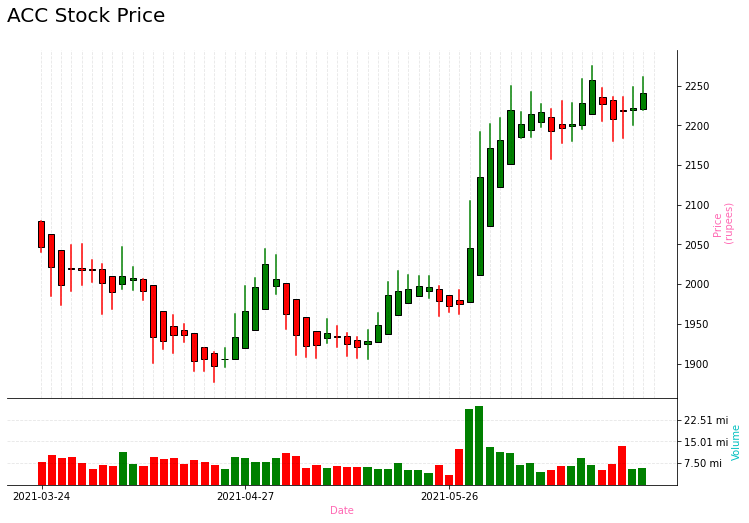

In [23]:
fig, (ax, ax2) = plt.subplots(2, figsize=(12,8), gridspec_kw={'height_ratios': [4, 1]})
lines = []
patches = []

for i in x:
    if df['c'][i] >=df['o'][i]:
        color = 'g'
        lower = df['o'][i]
        height = df['c'][i] - df['o'][i]
    else:
        color = 'r'
        lower = df['c'][i]
        height = df['o'][i] - df['c'][i]

    vline = Line2D(xdata=(i, i), ydata=(df['l'][i],df['h'][i]),color=color)

    rect = Rectangle(xy=(i-0.3,lower),width=0.6,height=height,facecolor=color,edgecolor='k')
    #rect.set_alpha(alpha=1.0)

    lines.append(vline)
    patches.append(rect)
    ax.add_line(vline)
    ax.add_patch(rect)
    ax.autoscale_view()
    
# ticks top plot
ax2.set_xticks(x[::20])
ax2.set_xticklabels(df.d.dt.date[::20])
ax.set_xticks(x, minor=True)
#ax.invert_xaxis()
#ax2.invert_xaxis()
ax.yaxis.tick_right()
# labels
ax.yaxis.set_label_position("right")
ax2.yaxis.set_label_position("right")
ax.set_ylabel('Price\n (rupees)',color='hotpink',fontsize=10)
ax2.set_xlabel('Date',color='hotpink',fontsize=10)
ax2.set_ylabel('Volume',color='c',fontsize=10)
# grid
ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
ax2.set_axisbelow(False)
ax2.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
# remove spines
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(True)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(True)
# plot volume
for i in x:
    if(df['c'][i]>=df['o'][i]):
        ax2.bar(x[i], df['v'][i], color='green')
    else:
        ax2.bar(x[i], df['v'][i], color='red')
# get max volume + 10%
mx = df['v'].max()*1.1
# define tick locations - 0 to max in 4 steps
yticks_ax2 = np.arange(0, mx+1, mx/4)
# create labels for ticks. Replace 1.000.000 by 'mi'
yticks_labels_ax2 = ['{:.2f} mi'.format(i/1000000) for i in yticks_ax2]
ax2.yaxis.tick_right() # Move ticks to the left side
# plot y ticks / skip first and last values (0 and max)
plt.yticks(yticks_ax2[1:-1], yticks_labels_ax2[1:-1])
plt.ylim(0,mx)
 
# title
ax.set_title('ACC Stock Price\n', loc='left', fontsize=20)
# no spacing between the subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()